<a href="https://colab.research.google.com/github/NikMilch/Google_Playstore/blob/main/Google_PlayStore_Apps_rating_predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime, date
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm

from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1. Introduction

Analyzing and creating models over Google PlayStore app data have a good potential to drive market to success. Different insights can show developers what to work on and how to capture better Android market. One of the most important insigne is the Raitin of the different apps.

This project present short EDA that later is used for prediction model. Machine Learning models that are applied in order to predict App raining are - Liner Regression, SVR, Decision Tree Regressor, Random Forest Regressor and KNeighborsRegresor. The data is continuous that why the regression models are used.

### __2. Reading and exploring the data__

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
google_playstore = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")


In [7]:
google_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
google_playstore.shape

(10841, 13)

In [9]:
google_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Almost whole data is type object - we should transform the object data into numeric data. Some of the columns should be also dropped.

### 2.1. Transforming object data in numeric data

In [10]:
# Dropping no-needed columns
# START SOLUTION

google_playstore = google_playstore.drop(["App", "Genres", "Current Ver", "Android Ver"], axis = 1)

#END SOLUTION

Transform ["Reviews"] column into float - when tries to convert it float it appears error - could not convert string to float: '3.0M'

In [11]:
# finding the row with review value = 3.5M 
# START SOLUTION
google_playstore[google_playstore["Reviews"] == '3.0M']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19


We can find that there is anomaly in row 10472 - the data is not placed correctly. This row should be dropped.   

In [12]:
# drop anomaly row and convert the Reviews columns in numeric data

google_playstore = google_playstore.drop(index = 10472)
google_playstore["Reviews"] = google_playstore["Reviews"].astype(float)

# END SOLUTION

Checking the unique values in Size is important in order to transform the columns in right numerical size. Below we can find that the part of the numbers is in MB, other part is kb and there are also rows with 'Varies with device'. How many rows are with "Varies with device" should be find and should be transformed in way that will not influence on the further results.

In [13]:
# START SOLUTION

google_playstore["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
google_playstore[google_playstore["Size"] == "Varies with device"]

# there are 1695 "Varies with device" for now it will be changed with nan, after research later will be dropped or 
# replaced with mean

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
37,ART_AND_DESIGN,4.1,36639.0,Varies with device,"5,000,000+",Free,0,Everyone,"July 14, 2018"
42,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,"July 30, 2018"
52,AUTO_AND_VEHICLES,4.6,17057.0,Varies with device,"1,000,000+",Free,0,Everyone,"July 30, 2018"
67,AUTO_AND_VEHICLES,4.3,40211.0,Varies with device,"5,000,000+",Free,0,Everyone,"July 30, 2018"
68,AUTO_AND_VEHICLES,3.9,356.0,Varies with device,"100,000+",Free,0,Everyone,"May 25, 2018"
...,...,...,...,...,...,...,...,...,...
10713,WEATHER,4.4,3471.0,Varies with device,"100,000+",Free,0,Everyone,"July 24, 2018"
10725,MAPS_AND_NAVIGATION,3.6,8.0,Varies with device,"1,000+",Free,0,Everyone,"September 27, 2017"
10765,SOCIAL,3.4,622.0,Varies with device,"100,000+",Free,0,Mature 17+,"May 23, 2018"
10826,SOCIAL,4.0,88486.0,Varies with device,"5,000,000+",Free,0,Mature 17+,"March 23, 2018"


In [15]:
# transform kb in MB and replace "Varies with device' with nan

def kb_to_mb(x):
    if 'k' in x:
        x = x.strip('k')
        return float(x)/1024
    elif 'M' in x:
        return x.strip('M')
    else:
        return np.nan
        
google_playstore['Size'] = google_playstore['Size'].apply(kb_to_mb)

In [16]:
google_playstore["Size"] = google_playstore["Size"].astype(float)

# END SOLUTION

Next row that should be transformed is "Installs".

In [17]:
# transform Installs into float
# START SOLUTION

google_playstore["Installs"] = google_playstore["Installs"].apply(lambda x: str(x).replace("+", ""))
google_playstore["Installs"] = google_playstore["Installs"].apply(lambda x: str(x).replace(",", ""))
google_playstore["Installs"] = google_playstore["Installs"].astype(float)

# END SOLUTION

Columns "Price" should be also transformed in numeric data.

In [18]:
# checking unique in Price and transform in float 
# START SOLUTION

google_playstore["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

There is a "$" sign in from of each value in the column.

In [19]:
# remove $ sign 

google_playstore["Price"] = google_playstore["Price"].apply(lambda x: str(x).replace("$", ""))
google_playstore["Price"] = google_playstore["Price"].astype(float)

In [20]:
# check the result 

google_playstore["Price"].unique()

# END SOLUTION

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Using the number of days since the last update will be easier for the future proceeding. 

In [21]:
# transform the data into number of days since the last update
# START SOLUTION

data = pd.to_datetime(google_playstore["Last Updated"])
google_playstore["Last Updated Days"] = data.apply(lambda x: date.today() - datetime.date(x))

In [22]:
google_playstore["Last Updated Days"].head()

0   1232 days
1   1224 days
2   1026 days
3   1080 days
4   1068 days
Name: Last Updated Days, dtype: timedelta64[ns]

In [23]:
# convert dtype: timedelta64 in float in order to be used in further ML models

google_playstore["Last Updated Days"] = google_playstore["Last Updated Days"].dt.days.astype("float")

In [24]:
google_playstore["Last Updated Days"]

0        1232.0
1        1224.0
2        1026.0
3        1080.0
4        1068.0
          ...  
10836    1398.0
10837    1052.0
10838    1584.0
10839    2316.0
10840    1033.0
Name: Last Updated Days, Length: 10840, dtype: float64

In [25]:
# the column with Last Updated date is no needed for future proceeding

google_playstore = google_playstore.drop("Last Updated", axis = 1)

# END SOLUTION

In [26]:
# checking data types after transformation
#START SOLUTION
google_playstore.dtypes
#ENA SOLUTON

Category              object
Rating               float64
Reviews              float64
Size                 float64
Installs             float64
Type                  object
Price                float64
Content Rating        object
Last Updated Days    float64
dtype: object

### 2.2 Dealing with the missing data 

In [27]:
# checking how many nan values has the dataset
#START SOLUTION 

google_playstore.isnull().sum()


Category                0
Rating               1474
Reviews                 0
Size                 1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Last Updated Days       0
dtype: int64

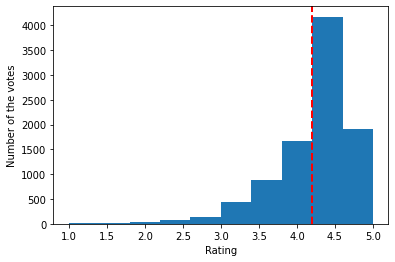

In [28]:
# Plot histogram of the "Rating" and the "Size"

plt.hist(google_playstore["Rating"])
plt.axvline(google_playstore["Rating"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Rating")
plt.ylabel("Number of the votes")
plt.show()

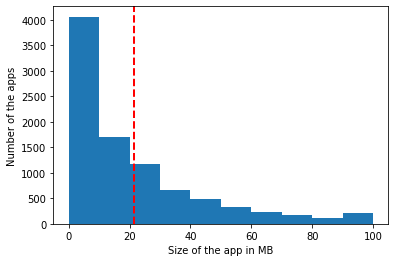

In [29]:
plt.hist(google_playstore["Size"])
plt.axvline(google_playstore["Size"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Size of the app in MB")
plt.ylabel("Number of the apps")
plt.show()

We can see that the missing data is in two columns and it is around 14% - 15% from the total rows. The percentage is not too high, but in order to have enough observation for better prediction models (decreasing bias) I will replace the missing values with mean

In [30]:
google_playstore["Rating"].fillna(google_playstore["Rating"].mean(), inplace = True)
google_playstore["Size"].fillna(google_playstore["Size"].mean(), inplace = True)


# END SOLUTION

In [31]:
# checking nan values in the columns. Only "Types" left with 1 row with nan value
#START SOLUTION
google_playstore.isna().sum()

Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Last Updated Days    0
dtype: int64

In [32]:
google_playstore["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [33]:
# analyzing the unique values of Type 
google_playstore["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [34]:
google_playstore["Type"].isna().sum()

1

In [35]:
# there is only one nan value in the column. It can be removed.

google_playstore["Type"] = google_playstore["Type"].fillna(0) 


In [36]:
google_playstore.isna().sum()
# END SOLUTION

Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated Days    0
dtype: int64

In [37]:
# checking again the columns nan and dtype

google_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           10840 non-null  object 
 1   Rating             10840 non-null  float64
 2   Reviews            10840 non-null  float64
 3   Size               10840 non-null  float64
 4   Installs           10840 non-null  float64
 5   Type               10840 non-null  object 
 6   Price              10840 non-null  float64
 7   Content Rating     10840 non-null  object 
 8   Last Updated Days  10840 non-null  float64
dtypes: float64(6), object(3)
memory usage: 846.9+ KB


In [38]:
google_playstore["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### 2.3 EDA VISUALIZING

Plotting the data will provide better understanding of the data before last 3 categorical columns to be converted into dummy variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

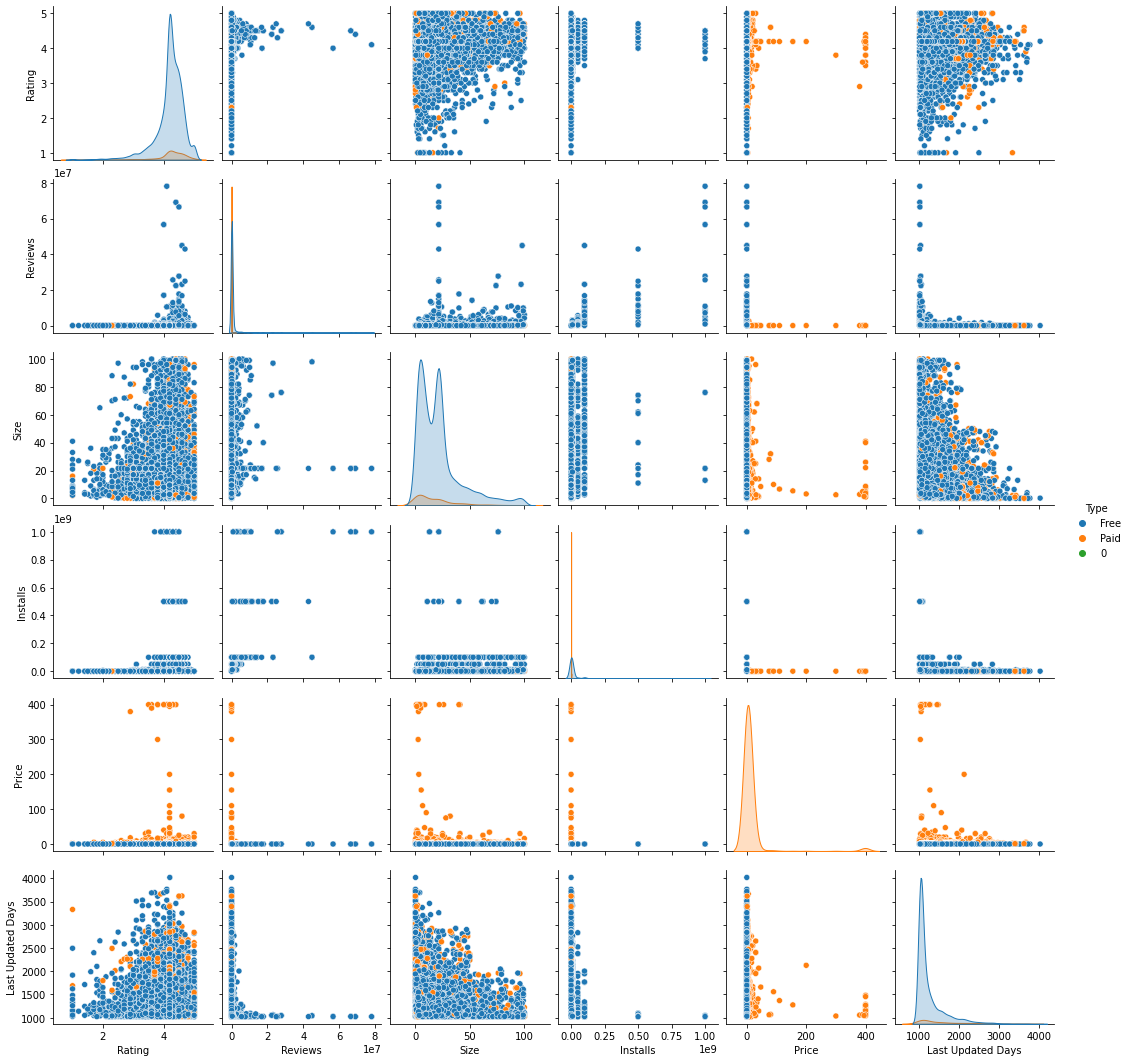

In [39]:
# Start Solution 
# Plotpair plot with diversion of the Type  - Free and Paid
sns.pairplot(google_playstore, hue = "Type")
plt.show()

Most of the ratings are between 4 and 4.6 (around 75% are above rating 4.5 with half of number of reviews). Higher numbers of ratings have also higher number of reviews (especially by free apps). Most of the apps are price below 50 and there is also cluster for app around 400$. Below is plotted a histogram of numbers of different ratings.

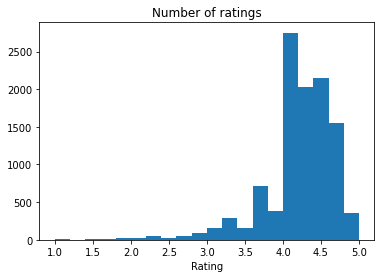

In [40]:
# Plotting histogram with number of ratings 

plt.hist(google_playstore["Rating"], bins = 20)
plt.title("Number of ratings")
plt.xlabel("Rating")
plt.show()

In [41]:
# descriptive statistic of the data summarizing the central tendency 

google_playstore.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,10840,33,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,10840,NaN,NaN,NaN,4.19176,0.478907,1,4.1,4.2,4.5,5
Reviews,10840,NaN,NaN,NaN,444153,2.92776e+06,0,38,2094,54775.5,7.81583e+07
Size,10840,NaN,NaN,NaN,21.5162,20.7478,0.00830078,5.9,18,26,100
Installs,10840,NaN,NaN,NaN,1.54643e+07,8.50294e+07,0,1000,100000,5e+06,1e+09
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10840,NaN,NaN,NaN,1.02737,15.9497,0,0,0,0,400
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Updated Days,10840,NaN,NaN,NaN,1278.72,394.611,1019,1038,1095,1341,4020


Most common Category is Family, Type - Free and Content Rating Everyone. Most of the apps are rate between 4.1 and 4.5.

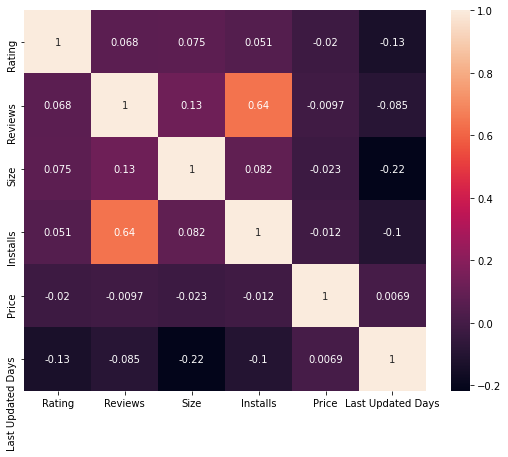

In [42]:
# plotting heathmap for correalation 

fig ,ax = plt.subplots(figsize = (9,7))
sns.heatmap(google_playstore.corr(), annot = True)
plt.show()

Positive correlation between number of the Install and the Reviews that means that more apps are downloaded if they have a 
review. The rest of the data has low positive or negative correlation.

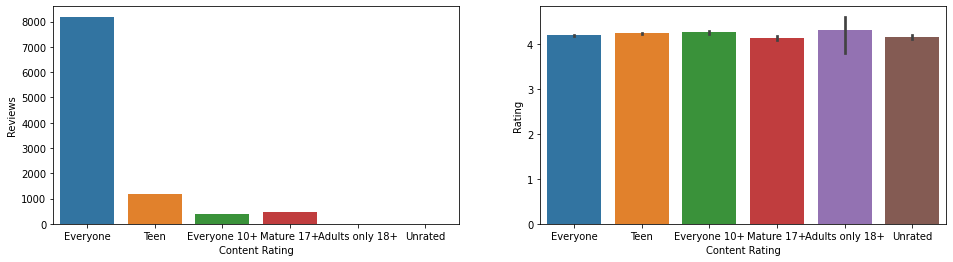

In [43]:
# Plotting the number of the reviews and average rating by content. 

fig ,ax = plt.subplots(1, 2, figsize = (16, 4))
sns.barplot(ax = ax[0], x = "Content Rating", y = "Reviews", data = google_playstore, ci = None, estimator = np.count_nonzero)
sns.barplot(ax = ax[1], x = "Content Rating", y = "Rating", data = google_playstore, estimator = np.mean)
plt.show()

Different Contents has close ratings. The Content with most number of ratings ins "Everyone".

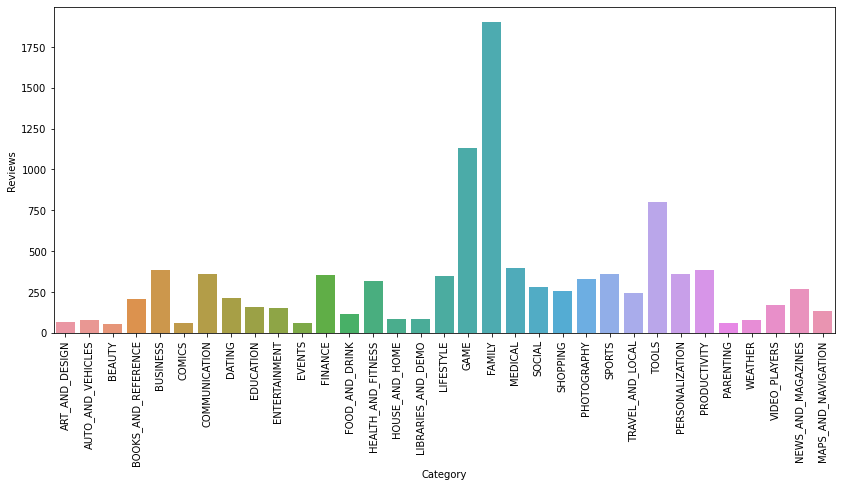

In [44]:
# Plotting the number of reviews and the average rating by category

fig ,ax = plt.subplots(figsize = (14, 6))
sns.barplot(x = "Category", y = "Reviews", data = google_playstore, ci = None, estimator = np.count_nonzero)
plt.xticks(rotation = 90)
plt.show()

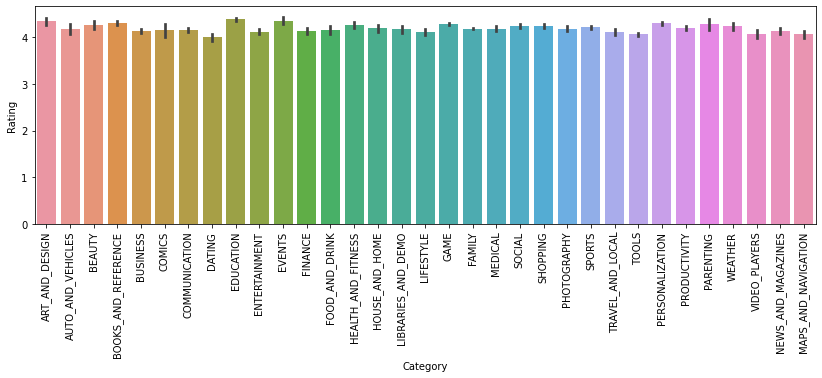

In [45]:
fig ,ax = plt.subplots(figsize = (14, 4))
sns.barplot(x = "Category", y = "Rating", data = google_playstore, estimator = np.mean)
plt.xticks(rotation = 90)
plt.show()

# END SOLUTION

Category apps with the high number of ratings are  "Communication", "Social", "Game". Also most of apps with less reviews has higher rating.

### 2.4 Splitting the data and converting categorical columns into dummy variables

 Converting categorical data in numeric using dummies. Types are only 2 categories and replace will be used. 

In [46]:
#START SOLUTION

# splitting the data 
g_playstore_features, g_playstore_labels = google_playstore.drop(["Rating"], axis = 1), google_playstore["Rating"]

In [47]:
# Replace "Paid" and "Free" with 0, 1 in column   "Type"

number =  {"Paid": 1, "Free": 0}
g_playstore_features["Type"].replace(number, inplace = True)

In [48]:
g_playstore_features = pd.get_dummies(g_playstore_features)

The range of the values in the data vary widely - the data is imbalanced. For better and faster conversion of the future ML models StandaredScaler will be helpful. The features will be on similar scale closed to normal distribution. Mean close to 0 and the std = 1, 68% of the data will be between -1 and 1.

In [49]:
# use StandardScaler

scaler = StandardScaler(with_mean = True, with_std = True)
g_playstore_features[g_playstore_features.columns] = scaler.fit_transform(g_playstore_features)

In [50]:
# checking the data after standardization  

g_playstore_features.head()

,Reviews,Size,Installs,Type,Price,Last Updated Days,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,-0.151657,-0.121279,-0.181761,-0.282279,-0.064416,-0.118401,12.87514,-0.088901,-0.070095,-0.14756,-0.210514,-0.074605,-0.192413,-0.148536,-0.120836,-0.118055,-0.077066,-0.471564,-0.186932,-0.10888,-0.343492,-0.18022,-0.090468,-0.088901,-0.191121,-0.113138,-0.21123,-0.163728,-0.074605,-0.193699,-0.178577,-0.201759,-0.156763,-0.167258,-0.191639,-0.290388,-0.156144,-0.128097,-0.087305,-0.016638,0.493938,-0.19927,-0.219669,-0.35414,-0.013584
1,-0.151381,-0.362280,-0.175998,-0.282279,-0.064416,-0.138675,12.87514,-0.088901,-0.070095,-0.14756,-0.210514,-0.074605,-0.192413,-0.148536,-0.120836,-0.118055,-0.077066,-0.471564,-0.186932,-0.10888,-0.343492,-0.18022,-0.090468,-0.088901,-0.191121,-0.113138,-0.21123,-0.163728,-0.074605,-0.193699,-0.178577,-0.201759,-0.156763,-0.167258,-0.191639,-0.290388,-0.156144,-0.128097,-0.087305,-0.016638,0.493938,-0.19927,-0.219669,-0.35414,-0.013584
2,-0.121820,-0.617740,-0.123073,-0.282279,-0.064416,-0.640458,12.87514,-0.088901,-0.070095,-0.14756,-0.210514,-0.074605,-0.192413,-0.148536,-0.120836,-0.118055,-0.077066,-0.471564,-0.186932,-0.10888,-0.343492,-0.18022,-0.090468,-0.088901,-0.191121,-0.113138,-0.21123,-0.163728,-0.074605,-0.193699,-0.178577,-0.201759,-0.156763,-0.167258,-0.191639,-0.290388,-0.156144,-0.128097,-0.087305,-0.016638,0.493938,-0.19927,-0.219669,-0.35414,-0.013584
3,-0.078053,0.167921,0.406180,-0.282279,-0.064416,-0.503608,12.87514,-0.088901,-0.070095,-0.14756,-0.210514,-0.074605,-0.192413,-0.148536,-0.120836,-0.118055,-0.077066,-0.471564,-0.186932,-0.10888,-0.343492,-0.18022,-0.090468,-0.088901,-0.191121,-0.113138,-0.21123,-0.163728,-0.074605,-0.193699,-0.178577,-0.201759,-0.156763,-0.167258,-0.191639,-0.290388,-0.156144,-0.128097,-0.087305,-0.016638,-2.024544,-0.19927,-0.219669,2.82374,-0.013584
4,-0.151381,-0.902121,-0.180703,-0.282279,-0.064416,-0.534019,12.87514,-0.088901,-0.070095,-0.14756,-0.210514,-0.074605,-0.192413,-0.148536,-0.120836,-0.118055,-0.077066,-0.471564,-0.186932,-0.10888,-0.343492,-0.18022,-0.090468,-0.088901,-0.191121,-0.113138,-0.21123,-0.163728,-0.074605,-0.193699,-0.178577,-0.201759,-0.156763,-0.167258,-0.191639,-0.290388,-0.156144,-0.128097,-0.087305,-0.016638,0.493938,-0.19927,-0.219669,-0.35414,-0.013584


In [51]:
# train test split 

g_playstore_features_train, g_playstore_features_test, g_playstore_labels_train, g_playstore_labels_test  = train_test_split(g_playstore_features, g_playstore_labels, train_size = 0.70, test_size = 0.30)

In [52]:
# check the right splitting 

g_playstore_features_train.shape, g_playstore_labels_train.shape, g_playstore_features_test.shape, g_playstore_labels_test.shape

((7587, 45), (7587,), (3252, 45), (3252,))

### 3. Linear Regression

Linear regression is used in order to try to forecast the rating and find the relationship between the variables. The regression depends mostly on number of independent variables and their relationships. 

In [53]:
# START SOLUTION
# import the model

lr_model = LinearRegression()

In [54]:
# train the data 

lr_model.fit(g_playstore_features_train, g_playstore_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lr_model.coef_

array([ 1.86688125e-02,  5.38092726e-03,  6.83097898e-03,  3.38442808e-02,
       -1.70462887e-02, -6.94107748e-02, -2.86600980e+09, -3.27436451e+09,
       -2.58940885e+09, -5.36112049e+09, -7.48324469e+09, -2.75421196e+09,
       -6.88792344e+09, -5.39505770e+09, -4.42121457e+09, -4.32229747e+09,
       -2.84401008e+09, -1.43211750e+10, -6.70516055e+09, -3.99456752e+09,
       -1.14056928e+10, -6.47982849e+09, -3.33118167e+09, -3.27436451e+09,
       -6.84491964e+09, -4.14691754e+09, -7.50652193e+09, -5.91937470e+09,
       -2.75421196e+09, -6.93061811e+09, -6.42440314e+09, -7.19690496e+09,
       -5.67991533e+09, -6.04013512e+09, -6.86215863e+09, -9.94170763e+09,
       -5.65856208e+09, -4.67855574e+09, -3.21651107e+09, -7.76731606e+09,
       -1.85415579e+11, -8.94983120e+10, -9.78559765e+10, -1.46942531e+11,
       -6.34227961e+09])

In [56]:
lr_model.intercept_

4.197311932028033

For evaluation of the models it is going to be used the following scores: 
  - r_2 - present the correlation / goodness of the fit of the regression line (ideal = 1). It presents how the regression model fit the data 
  - MSE - how close a regression line is to the set of point. Taking the distances from the point to the regression line and squared to remove the negative values (value close to 0 better)
  - MAE - absolute value between our target and predicted variables (better close to 0)
  - RMSE - standard deviation to the errors. Root of MSE (better close to 0)


In [57]:
# function that will be used for scoring all models

def display_scores(model, train_features, train_labels, test_features, test_labels):
    print(f"Train score r_2: {model.score(train_features, train_labels)}")
    print(f"Test score r_2 : {model.score(test_features, test_labels)}")  
    print(f"Train score MSE: {mean_squared_error(train_labels, model.predict(train_features))}")
    print(f"Test score MSE: {mean_squared_error(test_labels, model.predict(test_features))}") 
    print(f"Train score MAE: {mean_absolute_error(train_labels, model.predict(train_features))}")
    print(f"Test score MAE: {mean_absolute_error(test_labels, model.predict(test_features))}") 
    print(f"Train score RMSE: {np.sqrt(mean_squared_error(train_labels, model.predict(train_features)))}") 
    print(f"Test score RMSE: {np.sqrt(mean_squared_error(test_labels, model.predict(test_features)))}") 

In [58]:
# score linear regression
display_scores(lr_model, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.05185417047926899
Test score r_2 : 0.05082833880691762
Train score MSE: 0.2173149724410723
Test score MSE: 0.2178487070663529
Train score MAE: 0.30806788863107115
Test score MAE: 0.30928741007795324
Train score RMSE: 0.46617054008278164
Test score RMSE: 0.46674265614613897


r_2 score is very low but it doesn’t necessarily mean that the regression model is bad. Predictor variables still provide a response. MSE, MAE, RMSE are also far from 0. There is a high bias or variables. Another regression model should be tried.

In [59]:
# Plotting regression line can help even better fitting regression line

def plot_regression(model, title):
    prediction = model.predict(g_playstore_features_test)
    plt.figure(figsize=(8, 5))
    sns.set_style("darkgrid")
    sns.regplot(g_playstore_labels_test, prediction, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel("Predicted Ratings")
    plt.ylabel("Actual Ratings")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


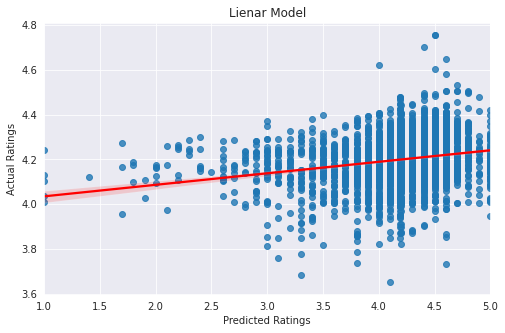

In [60]:
plot_regression(lr_model, "Lienar Model")

There are few outliers in the data - they are significant low and not change the position of the regression line. 

The residuals get larger as the prediction moves from small to large (or from large to small).That shows that when the rating is low there are not many reviews, but when the rating is high the prediction and actual data vary. We can find also that the outliers (even they are not much) has influence on the regression line. 

In [61]:
# residual plots can help to find problems with regression

def plot_residuals(model, title):
    plt.figure(figsize=(8, 5))
    sns.set_style("darkgrid")
    prediction = model.predict(g_playstore_features_test)
    sns.residplot(prediction, (g_playstore_labels_test - prediction), lowess = True, line_kws={"color": "red", "alpha":0.7,"lw":3})
    plt.title(title)
    plt.xlabel("Predicted Rating")
    plt.ylabel("Standartized Residual")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


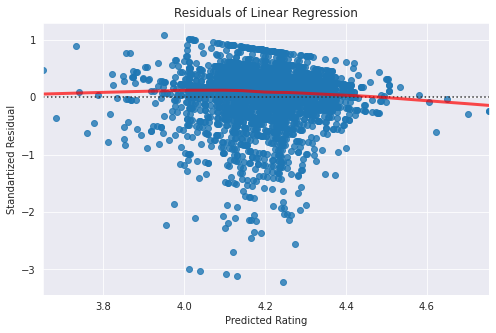

In [62]:
plot_residuals(lr_model, "Residuals of Linear Regression")

The high number of residuals are concentrated between predicting rating 4.0 - 4.4. Between that rating are also the most outliers. The model underfit the data before rating 4.3, around 4.4 is close to 0, after that the model closely overfit the model. 

In [63]:
# histogram can help to check if the variance is normally distributed

def residual_hist(model):
    plt.hist(g_playstore_labels_test - model.predict(g_playstore_features_test))
    plt.title("Histogram of residual")
    plt.show()

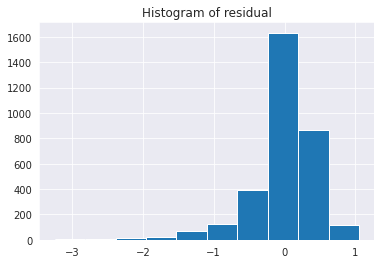

In [64]:
residual_hist(lr_model)

Most of residuals are around 0.

In [65]:
#END SOLUTION

### 4.  SVR

SVM can be used for classification and regression. In classification is used for prediction of continues variables - fitting the best line within predicted threshold value. It provides how much error is acceptable in the data and helps to find appropriate regression line. 

In [66]:
# START SOLUTION
# import the model
svr_model = svm.SVR()

In [67]:
# fit the train data in the model
svr_model.fit(g_playstore_features_train, g_playstore_labels_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
display_scores(svr_model, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.07799616994890124
Test score r_2 : 0.028727641241169107
Train score MSE: 0.21132322758767846
Test score MSE: 0.2229211387315703
Train score MAE: 0.28792014609350564
Test score MAE: 0.30152565333859505
Train score RMSE: 0.4596990619825958
Test score RMSE: 0.47214525173040794


Close to linear regression, SVR results display low r_2 score and high accuracy score. The results are similar on training and testing set - model underfit the data. RandomizedSearch will be used in order to search for best values of C - increasing the value of C will lower the penalty (by default C in SVR = 1). Randomized search is used over GridSearch in order to lower the time boundary.

In [69]:
# set parametars
svr_parametars = {"C":[0.1, 1, 10, 15, 30]}

In [70]:
# set randomized search
svr_randomized_search =  RandomizedSearchCV(svr_model, svr_parametars)

In [71]:
# fit the training data
svr_randomized_search.fit(g_playstore_features_train, g_playstore_labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 15, 30]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [72]:
# find the best prametars
svr_best = svr_randomized_search.best_estimator_

In [73]:
svr_best

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
# display the scores
display_scores(svr_best, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.07799616994890124
Test score r_2 : 0.028727641241169107
Train score MSE: 0.21132322758767846
Test score MSE: 0.2229211387315703
Train score MAE: 0.28792014609350564
Test score MAE: 0.30152565333859505
Train score RMSE: 0.4596990619825958
Test score RMSE: 0.47214525173040794


After the Randomized search and lower the regularization didn't improve the model performance. The scores are the same, because the best param for C stays C = 1.0.

Other parameters can be also tuned, but I will not preform them, because the search takes a long time. svr_parametars2 = {"degree":[2, 5 , 7, 10]} had been tried also, but increasing the degree didn't perform better scoring.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


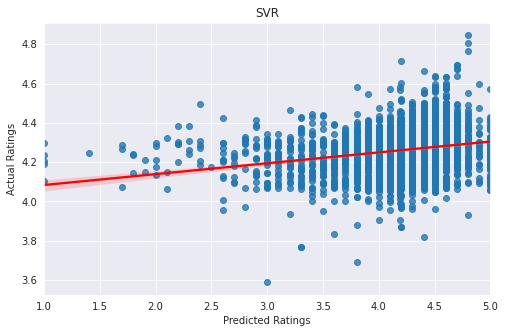

In [75]:
plot_regression(svr_model, "SVR")

Regression line predict lower score over than actual until around the rating 2.5 - but the amount of data is also low.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


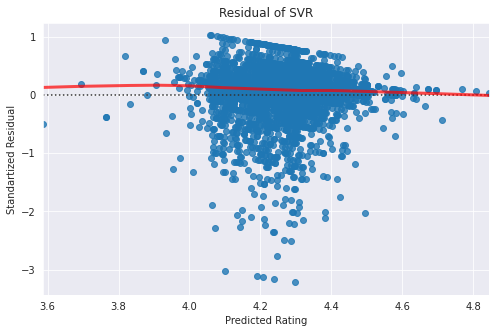

In [76]:
plot_residuals(svr_model, "Residual of SVR")

With lower rating residuals are negative values that mean that the actual data is higher than predicted. Residuals spread wider between 4.0 and 4.5.

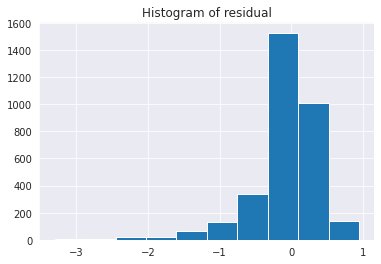

In [77]:
residual_hist(svr_model)

Histogram shows that most of residuals are closed to 0.

In [78]:
# END SOLUTION

### 5. Decision Tree Regressor

Decision Tree Regressor observed features and trains a model in tree structure - trains continuous variables. One of the most powerful ML models. It is fast and it can clearly show what variable significant effect the outcome of the model.

In [79]:
# START SOLUTION
# input the model 

tree_model =  DecisionTreeRegressor()

In [80]:
# fit the training sets 

tree_model.fit(g_playstore_features_train, g_playstore_labels_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [81]:
# display scores

display_scores(tree_model, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 1.0
Test score r_2 : -0.7441841155090303
Train score MSE: 1.313085724396611e-29
Test score MSE: 0.4003156330770591
Train score MAE: 8.316063594233247e-16
Test score MAE: 0.3797186652199649
Train score RMSE: 3.623652472846439e-15
Test score RMSE: 0.6327050126852632


Huge difference between between  training and testing set - the models overfits.

Grid Search will be used in order to find the best tuned parameters that will regulate the model. Cross-validation will be also implement in order to minimize overfitting.

In [82]:
# set parametars
parametars = {"max_depth": [1, 10, 15, 25, 35, 45, 50],
              "max_leaf_nodes": [5, 10, 20, 30, 35, 50],
              "min_samples_leaf": [2, 10, 15, 20, 25, 35]}

In [83]:
# fit the model in the grid search
tree_grid_search = GridSearchCV(tree_model, param_grid = parametars, cv = 5)

In [84]:
# grid search fit the train data

tree_grid_search.fit(g_playstore_features_train, g_playstore_labels_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 10, 15, 25, 35, 45, 50],
                         'max_leaf_nodes': [5, 10, 20, 30, 35, 50],
                    

In [85]:
# findin the best parametars for the decision tree model

tree_best_estimator = tree_grid_search.best_estimator_

In [86]:
tree_best_estimator

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=35, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [87]:
display_scores(tree_best_estimator, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.14436039677927415
Test score r_2 : 0.08852968477131197
Train score MSE: 0.1961125504157865
Test score MSE: 0.20919569959805068
Train score MAE: 0.29154218491444506
Test score MAE: 0.3030005655594505
Train score RMSE: 0.4428459669182802
Test score RMSE: 0.4573791639308143


Grid search regulate the model, but the scores are still low. However, the model has better performance than Linear Regression and SVR.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


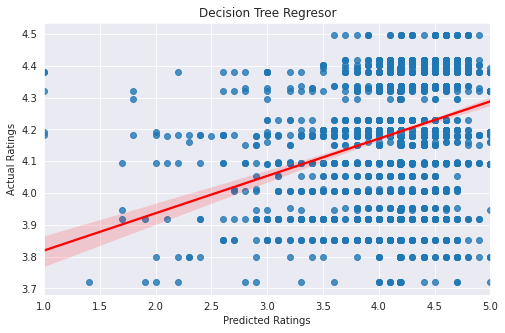

In [88]:
plot_regression(tree_best_estimator, "Decision Tree Regresor")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


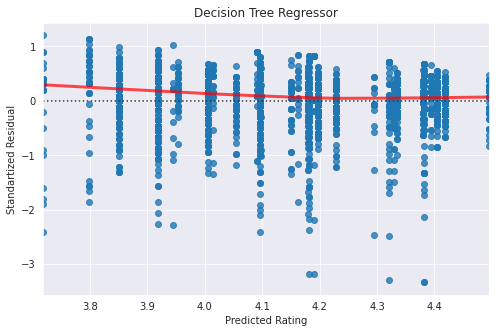

In [89]:
plot_residuals(tree_best_estimator, "Decision Tree Regressor")

The model mostly underestimates the data. Between 4.2 and  4.4 predict close to actual. Anyway, the data is widely spared - that describe that the model underfit the data.

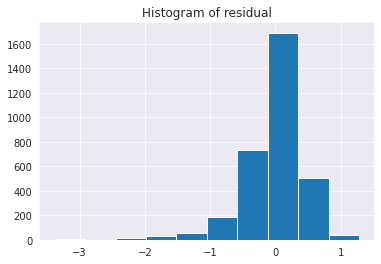

In [90]:
residual_hist(tree_best_estimator)

Most of residuals are over 0.

In [91]:
# END SOLUTION

### 7. Random Forest Regressor 

Random Forest Regressor is one of the most accurate learning algorithm and it can work with big datasets. It can estimate what variables are important for regression. It is combination of decision trees - combine weak leaners into one, performing better on random. It is bagging model - sampling with replacement. However Random Forest often overfit the model. The parameters should be tuned in order the model to be regulated. 

In [92]:
# START SOLUTION

# import the model

random_forst_model = RandomForestRegressor()

In [93]:
# fit the training data
random_forst_model.fit(g_playstore_features_train, g_playstore_labels_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
# score random forest

display_scores(random_forst_model, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.880793755538323
Test score r_2 : 0.1405844921526297
Train score MSE: 0.02732206473247651
Test score MSE: 0.19724836388603212
Train score MAE: 0.10404775200597864
Test score MAE: 0.2815861131401194
Train score RMSE: 0.1652938738504138
Test score RMSE: 0.4441265178820469


The model overfit the data. Randomized search will be used in order to find the best parameters. 

In [95]:
# set parametars

parametrs_forest = {"n_estimators": [100, 200, 300], "max_depth": [20, 50, 100]}

In [96]:
# import the randomizedSearch

forest_randomized_search = RandomizedSearchCV(random_forst_model, parametars, cv = 5)

In [97]:
# fit the traning data
forest_randomized_search.fit(g_playstore_features_train, g_playstore_labels_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [98]:
forest_best = forest_randomized_search.best_estimator_

In [99]:
# Radnom forest regresor scores
display_scores(forest_best, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.22074912207996042
Test score r_2 : 0.1411634263588354
Train score MSE: 0.17860425874095157
Test score MSE: 0.19711549006198656
Train score MAE: 0.2789937502150549
Test score MAE: 0.2924578030935942
Train score RMSE: 0.4226159707594491
Test score RMSE: 0.4439769026221821


The model still has low scores - but for now is the best performing model. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


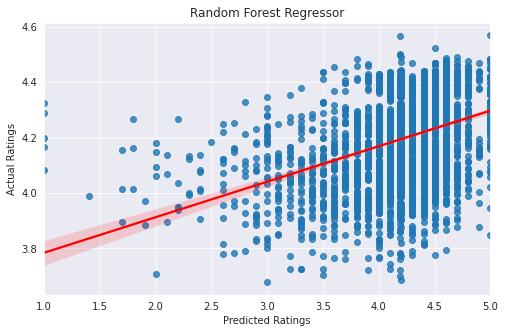

In [100]:
# Plot regression line

plot_regression(forest_best, "Random Forest Regressor")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


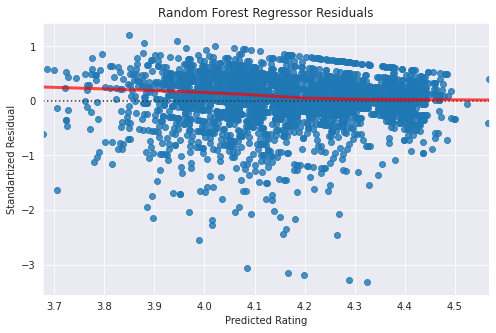

In [101]:
# Plot residual plot

plot_residuals(forest_best, "Random Forest Regressor Residuals")

The model underestimates the actual date until reaches 4.2. After that is close to 0. Residuals are better clustered around 0 than the other models, but still there are many outliers.

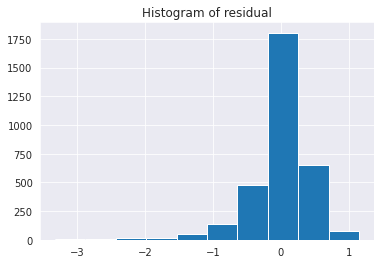

In [102]:
residual_hist(forest_best)

In [103]:
# END SOLUTION

### 8. KNeighborsRegresor

KNeigbors Regressor is also known as a "lazy model". The target is predicted by the local interpolation - nearest neighbors in the training set. Fitting the function by memorizing. KNeighhborsRegressor retuns the mean of the nearest k_neighbor.

In [104]:
# import the model
k_neighbors = KNeighborsRegressor()

In [105]:
# fit the training data in the model

k_neighbors.fit(g_playstore_features_train, g_playstore_labels_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [106]:
# diplay the k_neighbors score

display_scores(k_neighbors, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 0.29818014516214975
Test score r_2 : -0.0750212666441008
Train score MSE: 0.1608570724714136
Test score MSE: 0.24673302267882455
Train score MAE: 0.2718025610020354
Test score MAE: 0.3363571161976833
Train score RMSE: 0.4010699097057938
Test score RMSE: 0.49672227922534795


The model has difference between the result in training and the testing set. Grid Search with cross-validation will be used in order to find the best model parameters. 

In [107]:
# set parametars

k_neigbors_parm_grid = {"n_neighbors": [3 ,5, 9, 15, 35],
                        "weights": ["uniform", "distance"],
                        "metric": ["euclidean", "manhattan"]}

In [108]:
k_neighbors_grid_search = GridSearchCV(k_neighbors, param_grid = k_neigbors_parm_grid, cv = 5)

In [109]:
# fit the training data

k_neighbors_grid_search.fit(g_playstore_features_train, g_playstore_labels_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 9, 15, 35],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
k_neighbor_best = k_neighbors_grid_search.best_estimator_

In [111]:
k_neighbor_best

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                    weights='distance')

In [112]:
# display the scores

display_scores(k_neighbor_best, g_playstore_features_train, g_playstore_labels_train, g_playstore_features_test, g_playstore_labels_test)

Train score r_2: 1.0
Test score r_2 : 0.06660416009842607
Train score MSE: 7.798150506336614e-35
Test score MSE: 0.21422792653552133
Train score MAE: 1.7559873857258309e-19
Test score MAE: 0.2920627163125944
Train score RMSE: 8.830713734651698e-18
Test score RMSE: 0.4628476277734621


After the grid search we can find that the scores have even worse overfitting. I will try to use for loop in order to find the best k_neighbor parameter.  

In [113]:
# trying different n_neighbors in order to present the best scores on training and testing data

knn_r_acc = []
for i in range(1,40,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(g_playstore_features_train,g_playstore_labels_train)    
    test_score = knn.score(g_playstore_features_test, g_playstore_labels_test)
    train_score = knn.score(g_playstore_features_train,g_playstore_labels_train) 
    knn_r_acc.append((i, test_score ,train_score))
    
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1   -0.656113     1.000000
1    2   -0.272842     0.580096
2    3   -0.174829     0.438022
3    4   -0.109372     0.349905
4    5   -0.075021     0.298180
5    6   -0.054873     0.268492
6    7   -0.034291     0.244757
7    8   -0.030425     0.221240
8    9   -0.021637     0.202510
9   10   -0.013808     0.191667
10  11   -0.005048     0.178261
11  12    0.001132     0.171521
12  13    0.002353     0.165918
13  14    0.007174     0.158756
14  15    0.014435     0.154578
15  16    0.013613     0.149078
16  17    0.014633     0.143938
17  18    0.016071     0.140946
18  19    0.020825     0.139075
19  20    0.024019     0.136384
20  21    0.026550     0.132867
21  22    0.027432     0.130628
22  23    0.029007     0.128997
23  24    0.030329     0.126737
24  25    0.033872     0.126148
25  26    0.034919     0.125440
26  27    0.036199     0.122335
27  28    0.036721     0.119780
28  29    0.040776     0.116466
29  30    0.041691     0.113705
30  31  

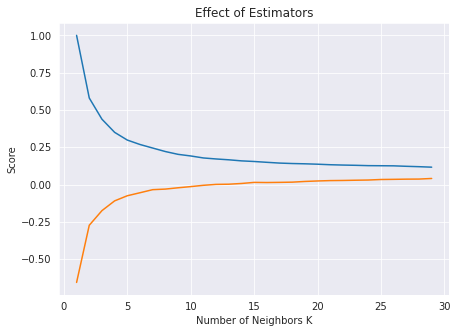

In [114]:
n_neighbors = np.arange(1, 30, 1)
scores = []
scores2 = []
for n in n_neighbors:
    k_neighbors.set_params(n_neighbors=n)
    k_neighbors.fit(g_playstore_features_train, g_playstore_labels_train)
    scores.append(k_neighbors.score(g_playstore_features_train, g_playstore_labels_train))
    scores2.append(k_neighbors.score(g_playstore_features_test, g_playstore_labels_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)
plt.plot(n_neighbors, scores2)
plt.show()

Increasing the number of the kneigbors showing close results between training and testing set. Even the overfitting can be regulated the model still have low results. That mean that we can not use that model in order to predict Google Playstore Apps ratings. 

### 9.Conclusion

App ratings will be hardly predicted with the models that are used above. All of the models have low accuracy score and high MSE, MAE, RMSE scores. All of this describe that the models are weak. However, if there is needed any prediction with the current data - RandoForestRegresor will be the best model to be used.

__BIBLIOGRAPHY__\
https://towardsdatascience.com/k-nearest-neighbors-94395f445221 \
https://towardsdatascience.com/how-to-change-datatypes-in-pandas-in-4-minutes-677addf9a409?gi=edba9cad9b7a \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html \
https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas\
https://seaborn.pydata.org/introduction.html\
https://seaborn.pydata.org/generated/seaborn.heatmap.html\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html \
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ \
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832 \
https://en.wikipedia.org/wiki/Linear_regression \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html \
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86 \
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html \
https://www.kaggle.com/getting-started/27261 \
https://stackoverflow.com/questions/33458959/finding-root-mean-squared-error-with-pandas-dataframe \
https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958 \
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d \
https://www.statisticshowto.com/absolute-error/\\
https://seaborn.pydata.org/examples/residplot.html \
https://stackoverflow.com/questions/62681388/residual-plot-for-residual-vs-predicted-value-in-python \
https://seaborn.pydata.org/tutorial/regression.html \
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html \
https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d \
https://scikit-learn.org/stable/modules/grid_search.html \
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e \
https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
https://stackoverflow.com/questions/57495123/optimizing-svr-parameters-using-gridsearchcv
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d \
https://medium.com/swlh/randomized-or-grid-search-with-pipeline-cheatsheet-719c72eda68
https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
https://medium.com/@chughkashish12/decision-tree-regression-in-machine-learning-4f117158cdcc \
https://medium.com/@bhartendudubey/decision-tree-regression-e202008c2df \
https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489 \
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html \
https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f \
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 \
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 \
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html \
https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4 \
https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7